In [1]:
import pandas as pd 
import numpy as np
import math
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

data = pd.read_csv('aug_train.csv')

In [2]:
set(data['last_new_job'].values)

{'1', '2', '3', '4', '>4', nan, 'never'}

In [3]:
data = data.drop(columns = ["enrollee_id", "city", "company_size", "company_type"])
data = data.dropna()
data["gender"] = np.where(data['gender'] == "Male", 1, 0)
data["relevent_experience"] = np.where(data['relevent_experience'] == "Has relevent experience", 1, 0)
med = np.median(data["training_hours"])
avg = np.mean(data["training_hours"])
data["training_hours"] = np.where(data['training_hours']>med, 1, 0)
data["enrolled_university"] = np.where(data['enrolled_university'] == "no_enrollment", 0, 1)
data["major_discipline"] = np.where(data['major_discipline'] == "STEM", 1, 0)
data = pd.get_dummies(data, columns=['education_level'])
data["experience"][data["experience"]==">20"] = 20
data["experience"][data["experience"]=="<1"] = 1
data["experience"] = data["experience"].astype(int)
data["last_new_job"][data["last_new_job"]==">4"] = 4
data["last_new_job"][data["last_new_job"]=="never"] = 0
data["last_new_job"] = data["last_new_job"].astype(int)

c:\users\moshe zisser\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\moshe zisser\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
c:\users\moshe zisser\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

In [4]:
data.head(6)

,city_development_index,gender,relevent_experience,enrolled_university,major_discipline,experience,last_new_job,training_hours,target,education_level_Graduate,education_level_Masters,education_level_Phd
0,0.920,1,1,0,1,20,1,0,1.0,1,0,0
1,0.776,1,0,0,1,15,4,0,0.0,1,0,0
4,0.767,1,1,0,1,20,4,0,0.0,0,1,0
7,0.762,1,1,0,1,13,4,0,1.0,1,0,0
8,0.920,1,1,0,1,7,1,0,1.0,1,0,0
11,0.920,1,1,0,1,5,1,1,0.0,1,0,0


In [5]:
data[data["gender"]==1][data["training_hours"]==1]

c:\users\moshe zisser\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,city_development_index,gender,relevent_experience,enrolled_university,major_discipline,experience,last_new_job,training_hours,target,education_level_Graduate,education_level_Masters,education_level_Phd
11,0.920,1,1,0,1,5,1,1,0.0,1,0,0
20,0.843,1,1,0,1,11,1,1,0.0,0,1,0
21,0.926,1,1,0,1,11,2,1,0.0,0,1,0
23,0.776,1,1,0,0,1,1,1,0.0,1,0,0
27,0.920,1,1,0,0,5,2,1,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19132,0.893,1,1,0,1,10,1,1,0.0,1,0,0
19135,0.802,1,1,0,1,8,2,1,0.0,1,0,0
19146,0.920,1,1,0,1,5,1,1,0.0,1,0,0
19147,0.624,1,0,1,1,1,1,1,1.0,1,0,0


In [6]:
col = "gender"
male_T = len(data[data[col]==1][data["training_hours"]==1])
male_NT = len(data[data[col]==1][data["training_hours"]==0])
female_T = len(data[data[col]==0][data["training_hours"]==1])
female_NT = len(data[data[col]==0][data["training_hours"]==0])
male_T,male_NT,female_T,female_NT

c:\users\moshe zisser\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\moshe zisser\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\moshe zisser\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
c:\users\moshe zisser\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


(5534, 5670, 660, 613)

In [7]:
col = "relevent_experience"
male_T = len(data[data[col]==1][data["training_hours"]==1])
male_NT = len(data[data[col]==1][data["training_hours"]==0])
female_T = len(data[data[col]==0][data["training_hours"]==1])
female_NT = len(data[data[col]==0][data["training_hours"]==0])
male_T,male_NT,female_T,female_NT

c:\users\moshe zisser\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\moshe zisser\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\moshe zisser\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
c:\users\moshe zisser\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


(5016, 4974, 1178, 1309)

In [8]:
col = "education_level_Phd"
male_T = len(data[data[col]==1][data["training_hours"]==1])
male_NT = len(data[data[col]==1][data["training_hours"]==0])
female_T = len(data[data[col]==0][data["training_hours"]==1])
female_NT = len(data[data[col]==0][data["training_hours"]==0])
male_T,male_NT,female_T,female_NT

c:\users\moshe zisser\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\moshe zisser\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\moshe zisser\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
c:\users\moshe zisser\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


(161, 164, 6033, 6119)

In [9]:
# calculate propensity score
all_dependent_variable = list(data.columns)
all_dependent_variable.remove('target')
all_dependent_variable.remove('training_hours')
X = data.loc[:, all_dependent_variable]
y = data.loc[:, ['training_hours']]
x = X
x = x.to_numpy()
y = y.to_numpy()
y = y.flatten()


In [10]:
clf = LogisticRegression(random_state=0).fit(x, y)

probs = clf.predict_proba(x[:, :])

In [11]:
p_t_1, p_t_0 = [], []
for i, val in enumerate(y):
    if y[i]==1:
        p_t_1.append(probs[i][1])
    if y[i]==0:
        p_t_0.append(probs[i][1])


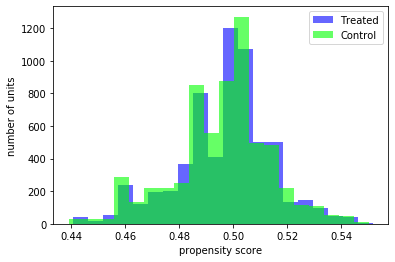

In [12]:
treat_plt = plt.hist(p_t_1,fc=(0, 0, 1, 0.6),bins=20,label='Treated')
cont_plt = plt.hist(p_t_0,fc=(0, 1, 0, 0.6),bins=20,label='Control',color='b')
plt.legend();
plt.xlabel('propensity score');
plt.ylabel('number of units');
